<a href="https://colab.research.google.com/github/jlidmar/cmplx/blob/master/logistic-map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic map

$$
x_{n+1} = r x_n (1 - x_n)
$$

In [0]:

import numpy as np
from matplotlib import pyplot as plt

In [0]:
def f(x,r):
  "Logistic map"
  return r*x*(1-x)

def f2(x,r):
  "Iterated twice"
  return fl(fl(x,r),r)

def f3(x,r):
  "Iterated thrice"
  return fl(f2(x,r),r)

Cobweb

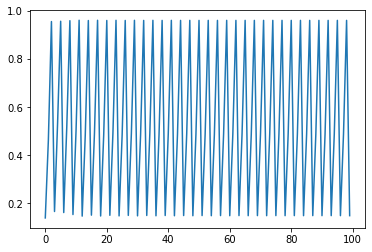

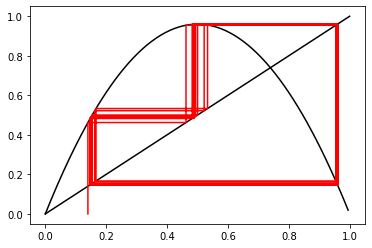

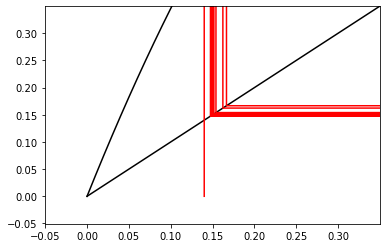

In [0]:
# r = 3.84
# x = 0.14

x = 0.14 #@param {type:"slider", min:0, max:1, step:0.01}

r = 3.84 #@param ["2.7", "3.05", "3.45", "3.5", "3.7", "3.84"] {type:"raw", allow-input: true}

# x = np.random.uniform()

y = 0

N = 1000

xx = np.zeros(2*N)
yy = np.zeros(2*N)

k = 0

for n in range(N):
  xx[k] = x
  yy[k] = y
  k = k + 1
  y = f(x,r)
  xx[k] = x
  yy[k] = y
  k = k + 1
  x = y

xxx = np.arange(0,1,0.005)
yyy = f(xxx,r)

plt.plot(range(0,100), xx[1:200:2]);
plt.figure()
plt.plot (xxx,yyy, 'k',[0, 1], [0, 1], 'k', xx,yy, 'r');

# Plot a zoom in
plt.figure();
xmin = xx[N-100] - 0.2
xmax = xmin + 0.4
plt.plot(xxx,yyy, 'k',[0, 1], [0, 1], 'k', xx,yy, 'r');
plt.axis([xmin,xmax,xmin,xmax]);

## Bifurcation diagram

Limit points $x_\infty$ of the map vs $r$

In [0]:
#@title Choose interval for r:

r_min = 2.85 #@param {type:"slider", min:0, max:4, step:0.01}
r_max = 4 #@param {type:"slider", min:0, max:4, step:0.01}

if (r_max < r_min):
  rmin = r_max

N = 1000
Ndisc = 300
Nr = 500

ts = np.arange(N)
rs = np.linspace(r_min,r_max,Nr,endpoint=False)
xs = np.zeros((N,Nr))

rr = 0
for r in rs:

  x = 0.8

  for t in range(Ndisc) :
    x = f(x,r)

  for t in ts:
    x = f(x,r)
    xs[t,rr] = x

  rr += 1

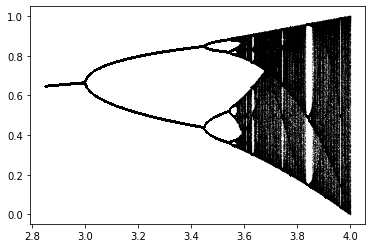

In [0]:
plt.scatter(np.outer(np.ones(ts.shape),rs),xs,0.01,color="black");